In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

<ipython-input-254-d5e212932491>:11: RuntimeWarning: divide by zero encountered in true_divide
  t = (x-e) / w
<ipython-input-254-d5e212932491>:71: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='', xy=(3.7,0.8), xytext=(8.7,0.8), arrowprops=dict(arrowstyle= '<|-|>', color='g', lw=1.5,ls='--'))
<ipython-input-254-d5e212932491>:73: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='', xy=(1.7,1), xytext=(3.2,0.7),arrowprops=dict(arrowstyle= '<-', color='b', lw=1.5,ls='--'))
<ipython-input-254-d5e212932491>:75: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='', xy

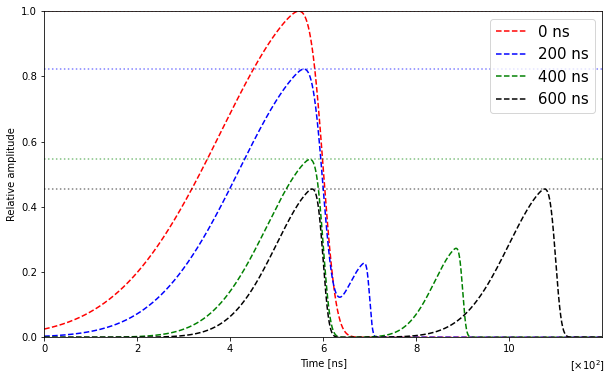

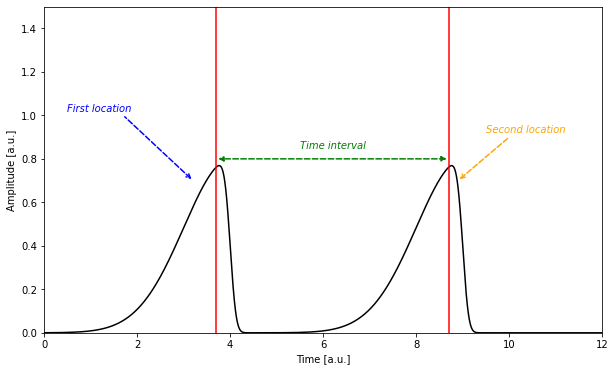

In [254]:
#Illustration of signal time difference
#--------------------------------------------------------

NUM_SAMPLES = 100000
SKEW_PARAMS = [10.]

def skew_norm_pdf(x,e=0.1,w=0.1,a=0.1):
    t = (x-e) / w
    return 2.0 * w * stats.norm.pdf(t) * stats.norm.cdf(-a*t)

# generate the skew normal PDF for reference:
location = 200.0
scale = 1.0
x = np.linspace(0,15,10000) 


plt.subplots(figsize=(10,6))
for alpha_skew in SKEW_PARAMS:
    p1 = skew_norm_pdf(x,6,scale,alpha_skew)+skew_norm_pdf(x,11,scale,alpha_skew)
    p2 = skew_norm_pdf(x,6,1.2,alpha_skew)+skew_norm_pdf(x,9,0.6,alpha_skew)
    p3 = skew_norm_pdf(x,6,1.8,alpha_skew)+skew_norm_pdf(x,7,0.5,alpha_skew)
    p4 = skew_norm_pdf(x,6,2.2,alpha_skew)+skew_norm_pdf(x,7,0.,alpha_skew)
    plt.plot(x,p4/max(p4),  '--', color='r', label='0 ns')
    plt.plot(x,p3/max(p4),  '--', color='b', label ='200 ns')
    plt.plot(x,p2/max(p4),  '--', color='g', label = '400 ns')
    plt.plot(x,p1/max(p4),  '--', color='k', label = '600 ns')
    plt.axhline(max(p4/max(p4)), linestyle=':', color='r', alpha=0.5)
    plt.axhline(max(p3/max(p4)), linestyle=':', color='b', alpha=0.5)
    plt.axhline(max(p2/max(p4)), linestyle=':', color='g', alpha=0.5)
    plt.axhline(max(p1/max(p4)), linestyle=':', color='k', alpha=0.5)

plt.ylim(0,1)
plt.xlim(0,12)
plt.xlabel('Time [ns]')
plt.text(11.3, -0.1, ("[×$10^{2}$]"), fontsize=10, color='k')
plt.xticks([0,2,4,6,8,10])
plt.ylabel('Relative amplitude')
plt.legend(loc=1, prop={'size': 15})

plt.subplots(figsize=(10,6))
for alpha_skew in SKEW_PARAMS:
    #p = skew_norm_pdf(x,location,scale,alpha_skew)+skew_norm_pdf(x,2,scale,alpha_skew)
    p = skew_norm_pdf(x,4,scale,alpha_skew)+skew_norm_pdf(x,9,scale,alpha_skew)
    plt.plot(x,p, color='k')
    
plt.ylim(0,1.5)
plt.xlim(0,12)
plt.xlabel('Time [a.u.]')
plt.ylabel('Amplitude [a.u.]')
plt.axvline(3.7, color='red')
plt.axvline(8.7, color='red')
plt.annotate(s='', xy=(3.7,0.8), xytext=(8.7,0.8), arrowprops=dict(arrowstyle= '<|-|>', color='g', lw=1.5,ls='--'))
plt.text(5.5, 0.85, ("Time interval"), fontsize=10, color='g', style='oblique',)
plt.annotate(s='', xy=(1.7,1), xytext=(3.2,0.7),arrowprops=dict(arrowstyle= '<-', color='b', lw=1.5,ls='--'))
plt.text(0.5, 1.02, ("First location"), fontsize=10, color='b', style='oblique',)
plt.annotate(s='', xy=(10,0.9), xytext=(8.9,0.7),arrowprops=dict(arrowstyle= '<-', color='orange', lw=1.5,ls='--'))
plt.text(9.5, 0.92, ("Second location"), fontsize=10, color='orange', style='oblique',)
